# Explore here

### 1. Problem Statement and Data Collection

#### 1.1 The problem
We'll be analysing a dataset containing Airbnb's listings for the city of New York during 2019 in order to understand if we can get any useful information from it.


In [160]:
# 1.2 Data Collection

import pandas as pd

# import dataset
abnb_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

abnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 2. Exploration and data cleaning

We'll try to understand the data and its main features.

In [161]:
# Obtain the dimensions of the dataset
abnb_data.shape

(48895, 16)

In [162]:
# Obtain information about data types and non-null values
abnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From here we can deduct that we're dealing with a dataset of 48895 rows and 16 columns. Most of the columns seem to be free of null values save for 4 of them.

Let's do a quick search of duplicates.

In [163]:
abnb_data.duplicated().sum()

0

The columns associated to the Ids of the hosts and listings don't add any significant value, since they're just identifiers, so we can drop them.

In [164]:
abnb_data.drop(['id', 'host_id'], axis=1, inplace=True)
abnb_data.info()
abnb_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_count  

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Now that our dataset seems to be neat and clean. Let's move on to the next part:

### 3. Analysis of univariate variables
#### 3.1 Analysis on categorical variables
Let's plot the categorical variables in our dataset and see what they can show us.

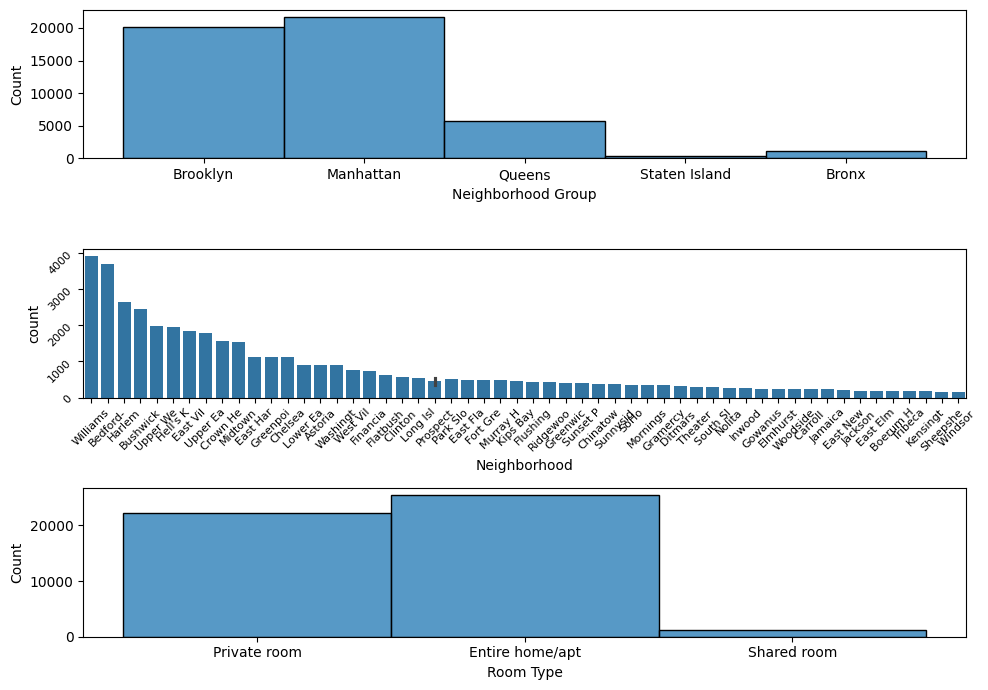

In [165]:
import matplotlib.pyplot as plt 
import seaborn as sns

# group by neighborhoods
abnb_data_neighborhoods = abnb_data.groupby(['neighbourhood'])['name'].count().reset_index( 
  name='count').sort_values(['count'], ascending=False)
# reindex
abnb_data_neighborhoods = abnb_data_neighborhoods.reset_index(drop=True)
# get top quarter
abnb_data_neighborhoods = abnb_data_neighborhoods[0:len(abnb_data_neighborhoods)//4]
# truncate labels
abnb_data_neighborhoods['neighbourhood'] = abnb_data_neighborhoods['neighbourhood'].apply(lambda x: x[:8])

fig, axs = plt.subplots(3, figsize = (10, 7))

# Create a multiple histogram
sns.histplot(ax = axs[0], data = abnb_data, x = "neighbourhood_group").set(xlabel = 'Neighborhood Group')
sns.barplot(ax = axs[1],data=abnb_data_neighborhoods, x = "neighbourhood", y = abnb_data_neighborhoods['count']).set(xlabel = 'Neighborhood')
axs[1].tick_params(labelrotation=45, labelsize=8)
sns.histplot(ax = axs[2], data = abnb_data, x = "room_type").set(xlabel = 'Room Type')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

It seems from these graphs that most of the listings are located in Brooklyn and Manhattan, with Williamsburg, Bedford-Stuyvesant and Harlem being the most popular neighborhoods. 

Also, it seems shared rooms are the less popular of the three types listed in this dataset. If I had to guess, I'd say these must be the cheapest.

#### 3.2 Analysis on numerical variables
Now let's plot the numerical variables. For this part lets focus on the columns that have a numeric data type in the dataframe. Since they have a significant amount of nulls, we'll omit the columns last_review, reviews_per_month.

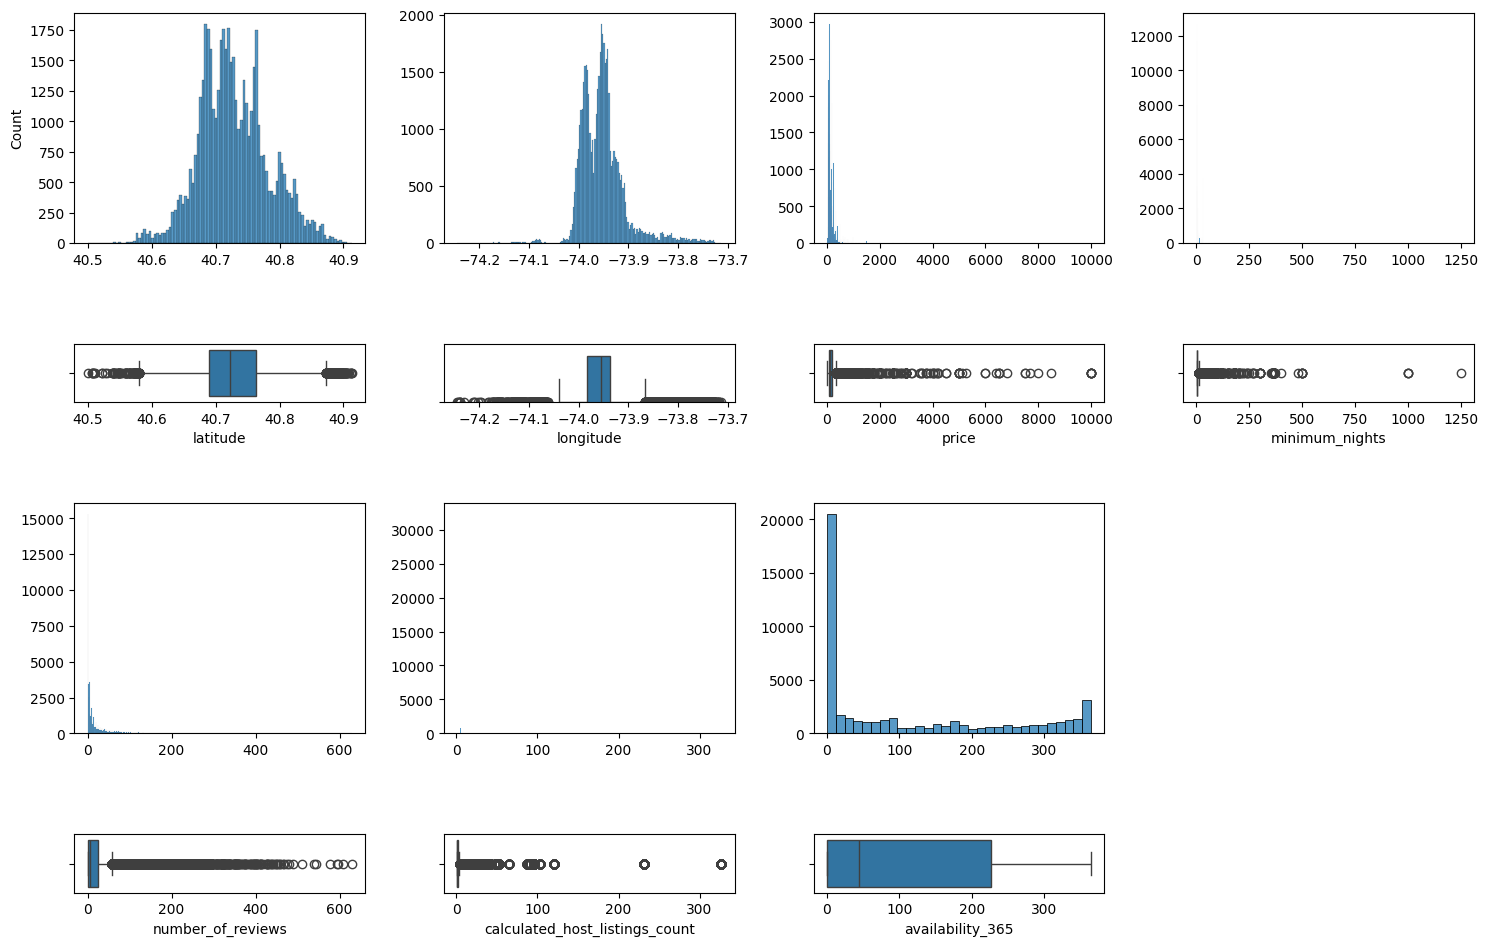

In [189]:
#abnb_data.info()

fig, axs = plt.subplots(4, 4, figsize = (15, 10))
fig.delaxes(axs[2, 3])
fig.delaxes(axs[3, 3])

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axs[0, 0], data = abnb_data, x = "latitude").set(xlabel = None)
sns.boxplot(ax = axs[1, 0], data = abnb_data, x = "latitude").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 1], data = abnb_data, x = "longitude").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 1], data = abnb_data, x = "longitude").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 2], data = abnb_data, x = "price").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 2], data = abnb_data, x = "price").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 3], data = abnb_data, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 3], data = abnb_data, x = "minimum_nights").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 0], data = abnb_data, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 0], data = abnb_data, x = "number_of_reviews").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 1], data = abnb_data, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 1], data = abnb_data, x = "calculated_host_listings_count").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 2], data = abnb_data, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 2], data = abnb_data, x = "availability_365").set_box_aspect(0.2)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

We can see for the numerical variables that latitude and longitude have a distribution that is somewhat normal, meaning that, at least for the coordinates, the airbnb listings accumulate on certain areas, most likely towards the neighbourhoods seen in the categorical analysis.

For the availability there seems to be a clear inclination towards zero, meaning that New York listings are highly solicited and a lot of them were occupied all year long in 2019.

The rest of the variables seem to have too many outliers to have a significant insight from them.

### 4. Analysis of multivariate variables
Now let's see how the variables relate to each other. Let's start with the numerival variables.

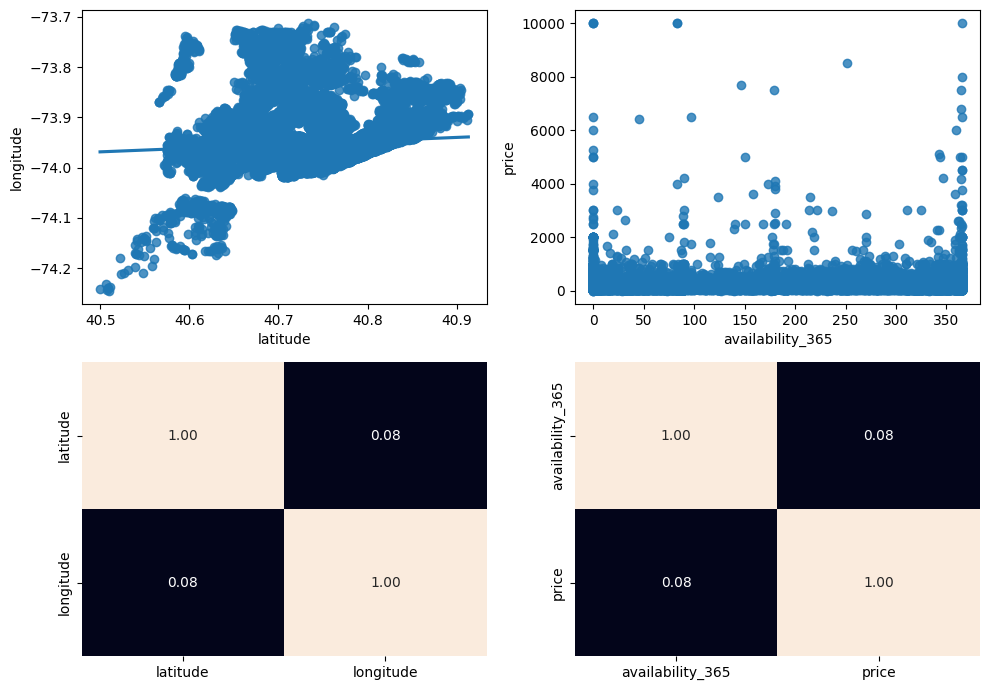

In [197]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = abnb_data, x = "latitude", y = "longitude")
sns.heatmap(abnb_data[["latitude", "longitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = abnb_data, x = "availability_365", y = "price")
sns.heatmap(abnb_data[["availability_365", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

While the heatmap seems to indicate the variables are not related, the coordinates scatter plot seems to indicate where in NYC the listings cluster, an interesting ecercise would be to overlap our graph with a satellite map of the city.

There doesn't seem to be any relationship between the price of a listing and its availability. 

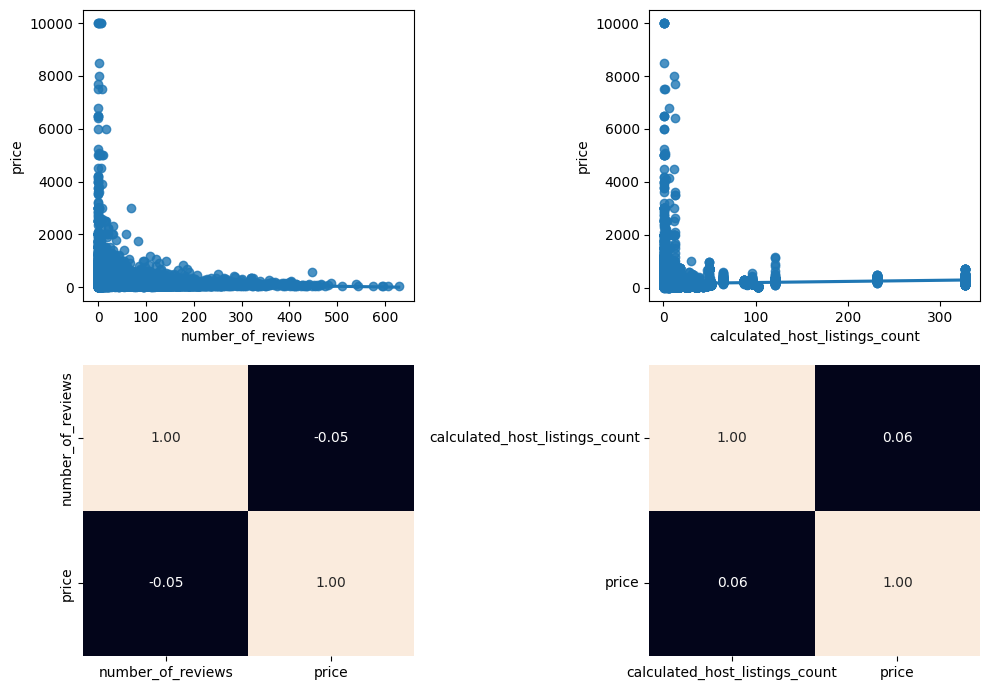

In [198]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = abnb_data, x = "number_of_reviews", y = "price")
sns.heatmap(abnb_data[["number_of_reviews", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = abnb_data, x = "calculated_host_listings_count", y = "price")
sns.heatmap(abnb_data[["calculated_host_listings_count", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### 5. Feature engineering
Let's analyse the null values and see if we can reduce them:

In [167]:
null_values = abnb_data[abnb_data.isna().any(axis=1)]
print(null_values.shape)
null_values.head()

(10074, 14)


,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,Huge 2 BR Upper East Cental Park,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,Magnifique Suite au N de Manhattan - vue Cloitres,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,Clean and Quiet in Brooklyn,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,Country space in the city,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


We seem to have >10k nulls, which is roughtly 20% of the dataset. Knowing this, it seems we wouldn't be able to remove the rows containing nulls without significantly affecting the data. We know from the previous step that most of the null values come from the columns related to reviews. Let's see what we're left with if we stop counting them.

In [168]:
data_without_reviews = abnb_data.drop(['last_review', 'reviews_per_month'], axis=1, inplace=False)
null_values = data_without_reviews[data_without_reviews.isna().any(axis=1)]
print(null_values.shape)
null_values.head()

(37, 12)


,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
360,Bienvenue,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,1,88
2700,Cozy Studio in Flatbush,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,1,342
2854,NaN,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,1,362
3703,NaN,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,1,341
5745,SPRING in the City!! Zen-Style Tranquil Bedroom,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,1,359


I've printed the head for readability, but after glancing the whole dataframe we can conclude that most of the nulls come from either the name or host_name columns. Since they are only 37, or 0.07% of the dataset, we can safely remove them.

In [169]:
abnb_data.drop(null_values.index, inplace=True)
abnb_data.shape

(48858, 14)

We still have >10k nulls from the review columns, which are too many to remove and too much missing information to consider the column in a ML model. These columns don't seem to add much value to a potential prediction of price, so I take the decision of removing them from the dataset.

In [170]:
abnb_data.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True)
abnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48858 non-null  object 
 1   host_name                       48858 non-null  object 
 2   neighbourhood_group             48858 non-null  object 
 3   neighbourhood                   48858 non-null  object 
 4   latitude                        48858 non-null  float64
 5   longitude                       48858 non-null  float64
 6   room_type                       48858 non-null  object 
 7   price                           48858 non-null  int64  
 8   minimum_nights                  48858 non-null  int64  
 9   number_of_reviews               48858 non-null  int64  
 10  calculated_host_listings_count  48858 non-null  int64  
 11  availability_365                48858 non-null  int64  
dtypes: float64(2), int64(5), object(